# 신용카드데이터

- YBIGTA DA 18기 남종현

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


## 결측치

- occyp_type: 30% 존재, 결측치 제거 or 열 제거

In [4]:
data.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [5]:
data.isnull().sum() / len(data)

index            0.000000
gender           0.000000
car              0.000000
reality          0.000000
child_num        0.000000
income_total     0.000000
income_type      0.000000
edu_type         0.000000
family_type      0.000000
house_type       0.000000
DAYS_BIRTH       0.000000
DAYS_EMPLOYED    0.000000
FLAG_MOBIL       0.000000
work_phone       0.000000
phone            0.000000
email            0.000000
occyp_type       0.308841
family_size      0.000000
begin_month      0.000000
credit           0.000000
dtype: float64

In [6]:
data['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

## 상관관계

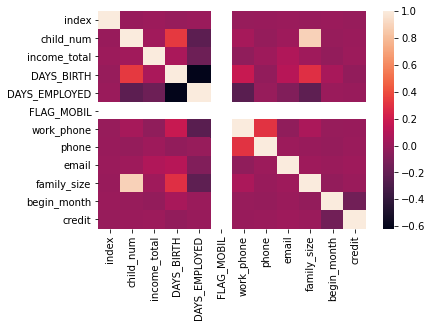

In [7]:
corr = data.corr()
sns.heatmap(corr)

## gender, car, reality

- 0,1로 변환

In [8]:
data['gender'] = data['gender'].replace(['F', 'M'], [0, 1])
data['car'] = data['car'].replace(['N', 'Y'], [0, 1])
data['reality'] = data['reality'].replace(['N', 'Y'], [0, 1])

In [9]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


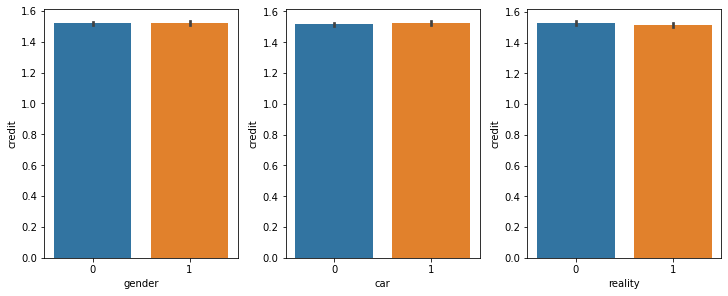

In [10]:
f, ax = plt.subplots(1, 3, figsize=(10,4), constrained_layout=True)

sns.barplot(x = 'gender', y='credit', data=data, ax=ax[0])
sns.barplot(x = 'car', y='credit', data=data, ax=ax[1])
sns.barplot(x = 'reality', y='credit', data=data, ax=ax[2])

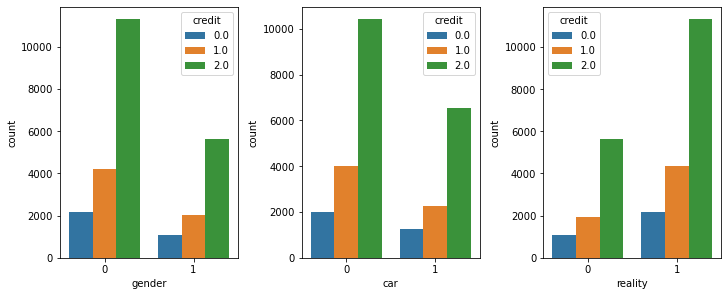

In [11]:
f, ax = plt.subplots(1, 3, figsize=(10,4), constrained_layout=True)

sns.countplot(x = 'gender', hue='credit', data=data, ax=ax[0])
sns.countplot(x = 'car', hue='credit', data=data, ax=ax[1])
sns.countplot(x = 'reality', hue='credit', data=data, ax=ax[2])

In [12]:
print(data['gender'].value_counts())
print(data['car'].value_counts())
print(data['reality'].value_counts())

0    17697
1     8760
Name: gender, dtype: int64
0    16410
1    10047
Name: car, dtype: int64
1    17830
0     8627
Name: reality, dtype: int64


## child_num, family_size

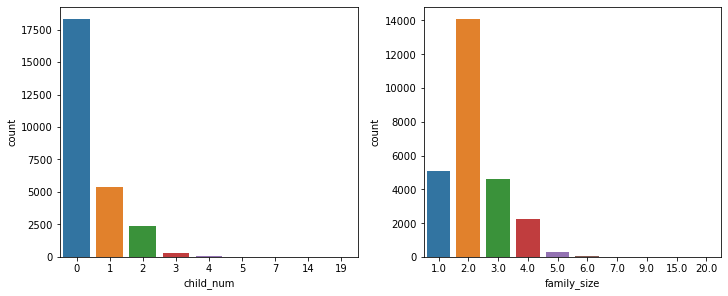

In [13]:
f, ax = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)

sns.countplot(x = 'child_num',  data=data, ax=ax[0])
sns.countplot(x = 'family_size',  data=data, ax=ax[1])

In [14]:
print(data['child_num'].value_counts())
print(data['family_size'].value_counts())

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64
2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64


- chile_num > 5, family_size > 7인 데이터 제거 필요해보임
- 하나만 사용해도 될것같음

## income, edu, family, house type

- labelencoder

In [15]:
print(data['income_type'].unique())
print(data['edu_type'].unique())
print(data['family_type'].unique())
print(data['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


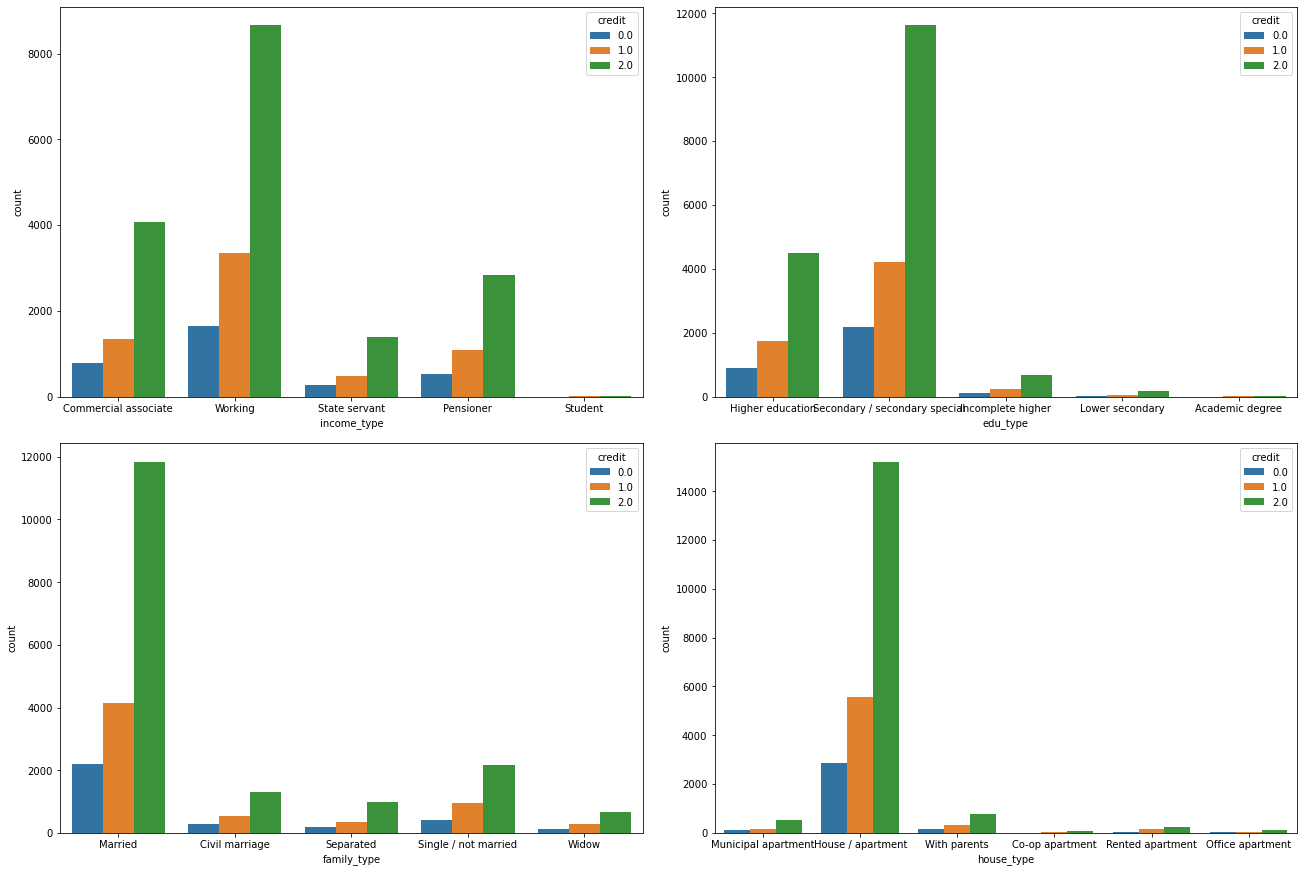

In [16]:
f, ax = plt.subplots(2, 2, figsize=(18,12), constrained_layout=True)

sns.countplot(x = 'income_type', hue='credit', data=data, ax=ax[0,0])
sns.countplot(x = 'edu_type', hue='credit', data=data, ax=ax[0,1])
sns.countplot(x = 'family_type', hue='credit', data=data, ax=ax[1,0])
sns.countplot(x = 'house_type', hue='credit', data=data, ax=ax[1,1])

In [17]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

data['income_type'] = enc.fit_transform(data['income_type'])
data['edu_type'] = enc.fit_transform(data['edu_type'])
data['family_type'] = enc.fit_transform(data['family_type'])
data['house_type'] = enc.fit_transform(data['house_type'])

## income_total, DAYS_BIRTH, DAYS_EMPLOYED, begin_month

- 음수값 양수로 변환 후 스케일링

In [17]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [18]:
data['DAYS_BIRTH'] = -data['DAYS_BIRTH']
data['DAYS_EMPLOYED'] = -data['DAYS_EMPLOYED']
data['begin_month'] = -data['begin_month']

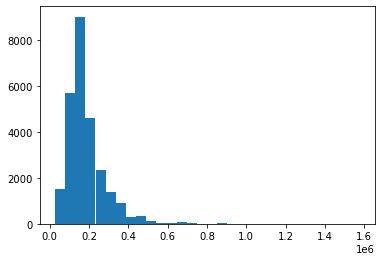

In [19]:
plt.hist(x = 'income_total', data=data, bins=30)
plt.show()

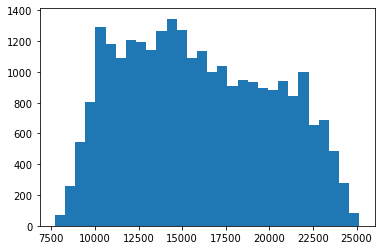

In [20]:
plt.hist(x = 'DAYS_BIRTH', data=data, bins=30)
plt.show()

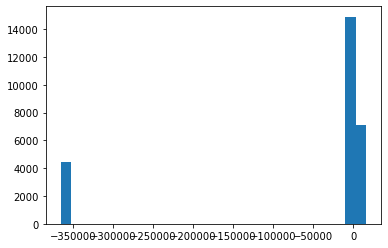

In [21]:
plt.hist(x = 'DAYS_EMPLOYED', data=data, bins=30)
plt.show()

- 음수값 바꿔줘야 함
- occyp_type 제거시 음수 데이터 제거됨

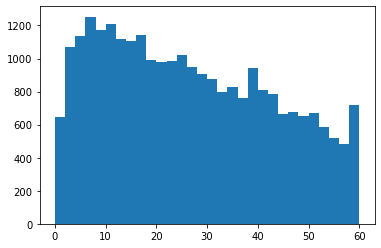

In [22]:
plt.hist(x = 'begin_month', data=data, bins=30)
plt.show()

- 스케일링해서 나이대별, 고용연차별, 카드발급연차 별로 진행하면 될것 같음

## FLAG_MOBIL, work_phone, phone, email

- FLAG_MOBIL : 삭제(모두 1)

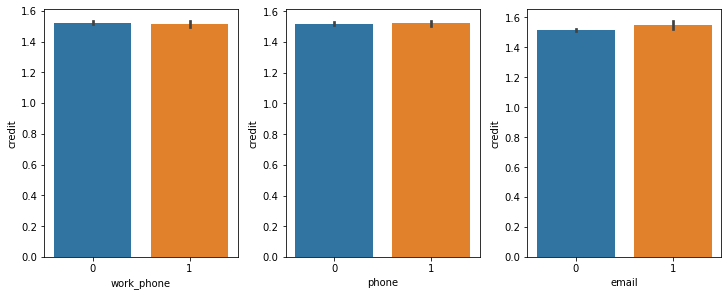

In [23]:
f, ax = plt.subplots(1, 3, figsize=(10,4), constrained_layout=True)

sns.barplot(x = 'work_phone', y='credit', data=data, ax=ax[0])
sns.barplot(x = 'phone', y='credit', data=data, ax=ax[1])
sns.barplot(x = 'email', y='credit', data=data, ax=ax[2])

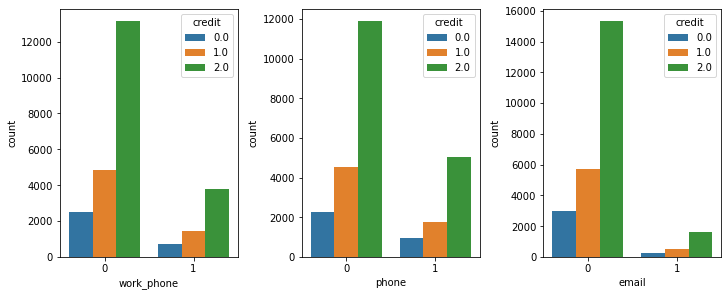

In [24]:
f, ax = plt.subplots(1, 3, figsize=(10,4), constrained_layout=True)

sns.countplot(x = 'work_phone', hue='credit', data=data, ax=ax[0])
sns.countplot(x = 'phone', hue='credit', data=data, ax=ax[1])
sns.countplot(x = 'email', hue='credit', data=data, ax=ax[2])

- phone, work_phone 둘중에 하나만 쓰고, email은 제외..?